In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
sim_database_path = "results/database_2.csv"
net_database_path = "networks/2/network_database_2.csv"
n_header_rows = 5

In [3]:
df_sim = pd.read_csv(sim_database_path, skiprows=n_header_rows)
df_net = pd.read_csv(net_database_path, skiprows=n_header_rows)
df = df_sim.merge(df_net, on="network_url")

In [12]:
int_cols = ["n_nodes", "n_edges"] + [col for col in df_net.columns if "in_" in col or "out_" in col]
df[int_cols] = df[int_cols].astype(np.int64)

In [13]:
df.head()

env  pi_0  pi_1  algo_0  algo_1  fov_0  fov_1  period_0  period_1  \
0    0  0.33  0.46       0       0      1      1         1         1   
1    0  0.15  0.38       0       0      1      1         1         1   
2    0  0.30  0.36       0       0      1      1         1         1   
3    0  0.64  0.67       0       0      1      1         1         1   
4    0  0.38  0.20       0       0      1      1         1         1   

        network_url            map_url  time  n_nodes  n_edges  in_0  in_1  \
0  networks/2/2.npy  maps/empty_10.npy   126        2        4     2     2   
1  networks/2/2.npy  maps/empty_10.npy   190        2        4     2     2   
2  networks/2/2.npy  maps/empty_10.npy   152        2        4     2     2   
3  networks/2/2.npy  maps/empty_10.npy    76        2        4     2     2   
4  networks/2/2.npy  maps/empty_10.npy   173        2        4     2     2   

   out_0  out_1  centr_0  centr_1  
0      2      2      4.0      4.0  
1      2      2      4.0      4.0  
2      2      2      4.0      4.0  
3      2      2      4.0      4.0  
4      2      2      4.0      4.0

0.31463
0.15707748545363348


(0.0, 1.0)

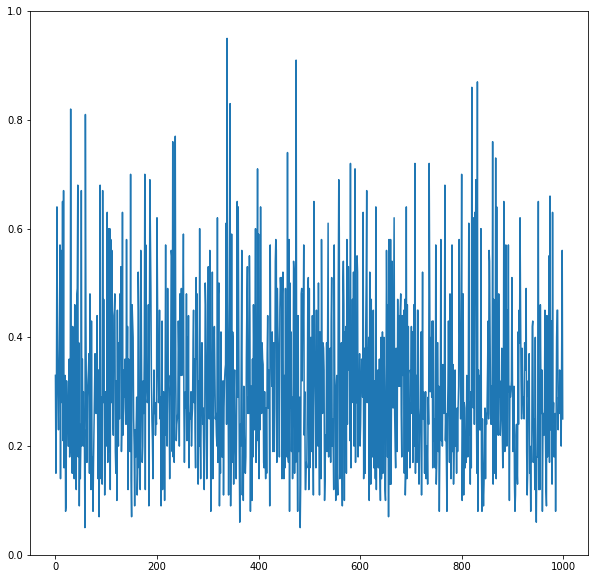

In [155]:
df2_1 = df[(df["n_edges"] == 4) & (df["fov_0"] == 1)]
plt.figure(figsize=(10,10))
df2_1["pi_0"].plot()
print(df2_1["pi_0"].mean())
std = df2_1["pi_0"].std()
print(std)
plt.ylim(0, 1)

In [171]:
import numpy as np

data = []
for i in range(1000):
    vec1_mag, vec2_mag = 1, 1
#     theta1, theta2 = np.random.uniform(0, np.pi, size=2)
    theta1 = np.random.normal(0, std)
    theta2 = np.random.normal(1.2 * np.pi / 3, std)
    vec1 = np.array([np.cos(theta1), np.sin(theta1)]) * vec1_mag
    vec2 = np.array([np.cos(theta2), np.sin(theta2)]) * vec2_mag
    data.append(np.abs(np.dot(vec1, vec2)))

0.317029992015193


(0.0, 1.0)

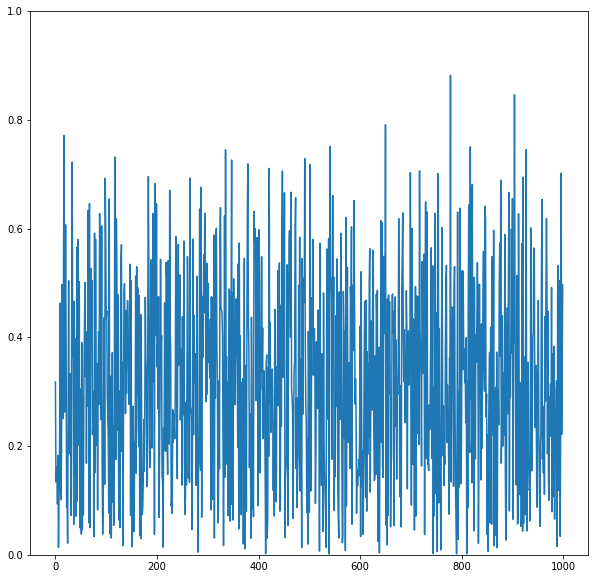

In [172]:
plt.figure(figsize=(10,10))
plt.plot(data)
print(np.mean(data))
plt.ylim(0, 1)